In [5]:
import geograph
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import argparse
import shapely#.geometry import Point, LineString
import random
import os

In [11]:
gdf = gpd.read_file("/home/hbaier/Desktop/archive/CAOE/data/MEX/MEX_ADM2_fixedInternalTopology.shp")
gdf = gdf[['shapeID', 'geometry']]

match = pd.read_csv("/home/hbaier/Desktop/geograph/data/gB_IPUMS_match.csv")
match = match[['shapeID', 'MUNI2015']]
ref_dict = dict(zip(match['MUNI2015'], match['shapeID']))

df = pd.read_csv("/home/hbaier/Desktop/geograph/data/mexico2010.csv")
df = df[['GEO2_MX', 'sum_income', 'total_pop', 'unrel_ppl', 'perc_urban', 'sum_num_intmig']]
df['GEO2_MX'] = df['GEO2_MX'].astype(str).str.replace("484", "").astype(int).map(ref_dict)
df = df.rename(columns = {'GEO2_MX': 'shapeID'})

gdf = pd.merge(gdf, df, on = 'shapeID')#.head()

target_id = random.choice(gdf['shapeID'].to_list())
degrees = random.randint(1, 4)

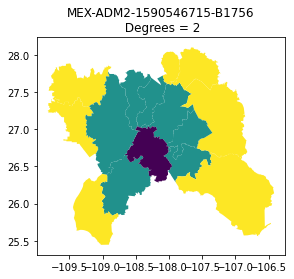

In [15]:
target_id = random.choice(gdf['shapeID'].to_list())
degrees = random.randint(1, 4)

g = geograph.GeoGraph(target_id, gdf, degrees = degrees, load_data = True, boxes = False)
g.show()